# Ankush Dey       Roll:- MDS202108
# Anjali Pugalia    Roll:- MDS202107

# NIPS

In [1]:
import numpy as np
import pandas as pd
import time
start=time.time()

In [2]:
df=pd.read_csv('docwordnips.txt',skiprows=3,sep=' ',header=None)

In [3]:
df

,0,1,2
0,1,2,1
1,1,39,1
2,1,42,3
3,1,77,1
4,1,95,1
...,...,...,...
746311,1500,12382,1
746312,1500,12388,3
746313,1500,12390,1
746314,1500,12393,1


In [4]:
len(df[0].unique())

1500

In [5]:
df.groupby([0]).count()

,1,2
0,,
1,532,532
2,550,550
3,560,560
4,757,757
5,578,578
...,...,...
1496,574,574
1497,585,585
1498,497,497


## Creating Sparse Matrix

In [6]:
m=np.zeros((max(list(df[1]))+1,len(set(df[0]))+1))
for j in range(len(df[1])):
    m[int(df[1][j]),int(df[0][j])]=1
sparse_matrix=pd.DataFrame(m)
sparse_matrix=sparse_matrix.iloc[1:,1:]
sparse_matrix

,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating Jaccard Matrix 

In [7]:
from sklearn.metrics import pairwise_distances
num = sparse_matrix.to_numpy()
num = np.transpose(num)
jaccard = 1-pairwise_distances(num, metric = 'jaccard')

C:\Users\LENOVO\anaconda3\envs\XCS224N\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [8]:
pd.DataFrame(jaccard)

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,1.000000,0.165948,0.155556,0.171818,0.184632,0.135041,0.165259,0.135338,0.164229,0.182851,...,0.140312,0.143005,0.155340,0.136782,0.159715,0.148494,0.157513,0.145880,0.140719,0.007042
1,0.165948,1.000000,0.150259,0.164884,0.197452,0.124575,0.154930,0.157895,0.171301,0.168844,...,0.157778,0.159255,0.169409,0.130191,0.152239,0.135354,0.156983,0.149286,0.133789,0.010381
2,0.155556,0.150259,1.000000,0.155263,0.157681,0.121924,0.150463,0.129383,0.157952,0.136628,...,0.138528,0.147059,0.154502,0.146561,0.149606,0.164271,0.158907,0.143939,0.167498,0.004535
3,0.171818,0.164884,0.155263,1.000000,0.199461,0.115242,0.186255,0.113189,0.167748,0.155143,...,0.141682,0.158813,0.167492,0.158397,0.176724,0.168569,0.160900,0.131769,0.150547,0.012150
4,0.184632,0.197452,0.157681,0.199461,1.000000,0.140782,0.167243,0.152542,0.205128,0.174556,...,0.165577,0.158266,0.194203,0.173469,0.176587,0.164813,0.179513,0.164680,0.162268,0.010056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.148494,0.135354,0.164271,0.168569,0.164813,0.106638,0.144154,0.092166,0.127749,0.146860,...,0.165027,0.212924,0.172217,0.136714,0.183183,1.000000,0.183861,0.157838,0.205493,0.007839
1496,0.157513,0.156983,0.158907,0.160900,0.179513,0.127193,0.146232,0.121637,0.140461,0.161979,...,0.174482,0.200415,0.218627,0.132609,0.229897,0.183861,1.000000,0.168467,0.204431,0.019016
1497,0.145880,0.149286,0.143939,0.131769,0.164680,0.108491,0.133983,0.125323,0.128668,0.149068,...,0.248737,0.136170,0.179775,0.131673,0.165612,0.157838,0.168467,1.000000,0.172487,0.027466
1498,0.140719,0.133789,0.167498,0.150547,0.162268,0.104822,0.159822,0.109234,0.133266,0.150376,...,0.188578,0.227414,0.209724,0.139808,0.197446,0.205493,0.204431,0.172487,1.000000,0.007527


## Fitting the data on the K-Means model

In [9]:
from sklearn.cluster import KMeans
l=[]
%load_ext memory_profiler
for i in range(1,10):
    model=KMeans(n_clusters = i,init = 'k-means++',max_iter = 50,n_init = 10)
    %memit model.fit(jaccard)
    l.append(model.inertia_)

C:\Users\LENOVO\anaconda3\envs\XCS224N\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


peak memory: 333.81 MiB, increment: 20.17 MiB
peak memory: 334.45 MiB, increment: 17.80 MiB
peak memory: 334.68 MiB, increment: 17.40 MiB
peak memory: 334.90 MiB, increment: 17.38 MiB
peak memory: 335.04 MiB, increment: 17.31 MiB
peak memory: 335.20 MiB, increment: 17.32 MiB
peak memory: 335.34 MiB, increment: 17.30 MiB
peak memory: 335.75 MiB, increment: 17.58 MiB
peak memory: 335.89 MiB, increment: 17.31 MiB


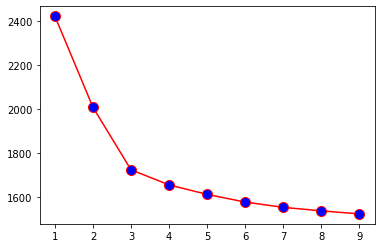

In [10]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)),l, c='r', marker='o' , markerfacecolor='blue' , markersize=10)


## Final Model

In [11]:
%load_ext memory_profiler
model1=KMeans(n_clusters=3,init='k-means++',max_iter=50,n_init=10,random_state=42)
%memit model1.fit(jaccard)
model1.inertia_
y_pred=model1.predict(jaccard)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 354.59 MiB, increment: 17.29 MiB


In [12]:
y_pred

array([0, 0, 0, ..., 0, 0, 2])

In [13]:
output={}
for i in np.unique(y_pred):
    output[i]=[]
    for j in range(len(y_pred)):
        if y_pred[j]==i:
            output[i].append(j+1)
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

0 : 956
1 : 524
2 : 20


In [14]:
from sklearn.decomposition import PCA
Matrix_PCA=PCA(n_components=2)
new=Matrix_PCA.fit_transform(jaccard)
x,y=new[:,0],new[:,1]
cluster_color={0:"#FF4040",1:"#7FFF00",2:"#0A0A0A"}
cluster_names={0:'cluster1',1:'cluster2',2:'cluster3'}
cluster=model1.labels_.tolist()

In [15]:
jaccard=pd.DataFrame(jaccard)


## Cluster Plot

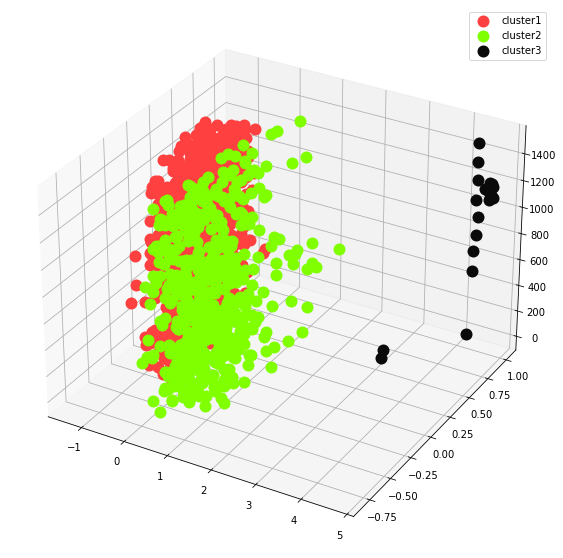

In [16]:
M=pd.DataFrame(dict(x=x,y=y,z=jaccard.columns,label=cluster))
L=M.groupby('label')
plt.figure("NIPS",figsize=(20,10))
axis=plt.axes(projection='3d')
axis.margins(0.05)
for name, group in L:
    
    axis.plot(group.x,group.y,group.z, marker='o',linestyle="",ms=12,
                 label=cluster_names[name],color=cluster_color[name],mec='none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis='x',
                     which='both',
                     bottom='off',
                     top='off',
                     labelbottom='off')
    axis.tick_params(\
                      axis='y',
                      which='both',
                      bottom='off',
                      top='off',
                      labelbottom='off')
axis.legend(numpoints=1)        
    
       
        
        

In [17]:
end=time.time()
end-start

38.42459058761597

# KOS

In [18]:
start=time.time()

In [19]:
kos=pd.read_csv('docwordkos.txt',skiprows=3,sep=' ',header=None)

In [20]:
kos

,0,1,2
0,1,61,2
1,1,76,1
2,1,89,1
3,1,211,1
4,1,296,1
...,...,...,...
353155,3430,6328,1
353156,3430,6644,1
353157,3430,6741,1
353158,3430,6799,1


## Creating sparse matrix 

In [21]:
m=np.zeros((len(set(kos[1]))+1,len(set(kos[0]))+1))
for j in range(len(kos[1])):
    m[int(kos[1][j]),int(kos[0][j])]=1
sparse_matrix=pd.DataFrame(m)
sparse_matrix=sparse_matrix.iloc[1:,1:]
sparse_matrix

,1,2,3,4,5,6,7,8,9,10,...,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating Jaccard Matrix 

In [22]:
from sklearn.metrics import pairwise_distances
num=sparse_matrix.to_numpy()
num=np.transpose(num)
jaccard=1-pairwise_distances(num, metric='jaccard')

C:\Users\LENOVO\anaconda3\envs\XCS224N\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [23]:
pd.DataFrame(jaccard)

,0,1,2,3,4,5,6,7,8,9,...,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429
0,1.000000,0.066667,0.035398,0.042781,0.080717,0.039062,0.061350,0.037037,0.222222,0.029851,...,0.038043,0.045455,0.043478,0.028369,0.046667,0.072993,0.076271,0.042169,0.019108,0.029586
1,0.066667,1.000000,0.062857,0.027972,0.048913,0.049383,0.068376,0.033708,0.054054,0.084337,...,0.051471,0.031674,0.073171,0.077778,0.058252,0.064516,0.067568,0.033058,0.027523,0.024390
2,0.035398,0.062857,1.000000,0.032710,0.051181,0.039216,0.047368,0.050633,0.043716,0.025000,...,0.038278,0.696629,0.043210,0.036364,0.033898,0.054878,0.033784,0.031088,0.033333,0.025641
3,0.042781,0.027972,0.032710,1.000000,0.157360,0.016949,0.032258,0.024194,0.013333,0.024590,...,0.034884,0.035433,0.023973,0.031250,0.028571,0.030769,0.017857,0.032258,0.027972,0.032051
4,0.080717,0.048913,0.051181,0.157360,1.000000,0.031056,0.072917,0.061350,0.076087,0.023952,...,0.041860,0.065517,0.061538,0.022989,0.049724,0.052632,0.052632,0.051020,0.043243,0.056122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0.072993,0.064516,0.054878,0.030769,0.052632,0.090909,0.098039,0.097222,0.130435,0.040541,...,0.023622,0.053922,0.032922,0.090909,0.142857,1.000000,0.346939,0.066667,0.076087,0.066038
3426,0.076271,0.067568,0.033784,0.017857,0.052632,0.106383,0.108434,0.092593,0.105263,0.036364,...,0.028037,0.031746,0.031250,0.066667,0.101449,0.346939,1.000000,0.121951,0.053333,0.056818
3427,0.042169,0.033058,0.031088,0.032258,0.051020,0.031579,0.045455,0.029412,0.031746,0.009804,...,0.026316,0.029915,0.037453,0.047619,0.060870,0.066667,0.121951,1.000000,0.262626,0.029630
3428,0.019108,0.027523,0.033333,0.027972,0.043243,0.062500,0.024590,0.045455,0.035398,0.022727,...,0.036232,0.036364,0.023256,0.043011,0.048077,0.076087,0.053333,0.262626,1.000000,0.285714


## Fitting the data into K-means model 

In [24]:
%load_ext memory_profiler
from sklearn.cluster import KMeans
l=[]
for i in range(1,10):
    model=KMeans(n_clusters=i,init='k-means++',max_iter=50,n_init=10)
    %memit model.fit(jaccard)
    l.append(model.inertia_)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 725.72 MiB, increment: 89.79 MiB
peak memory: 725.72 MiB, increment: 89.76 MiB
peak memory: 725.72 MiB, increment: 89.76 MiB
peak memory: 725.66 MiB, increment: 89.76 MiB
peak memory: 725.66 MiB, increment: 89.76 MiB
peak memory: 725.98 MiB, increment: 90.08 MiB
peak memory: 726.52 MiB, increment: 90.31 MiB
peak memory: 726.52 MiB, increment: 89.76 MiB
peak memory: 724.79 MiB, increment: 92.98 MiB


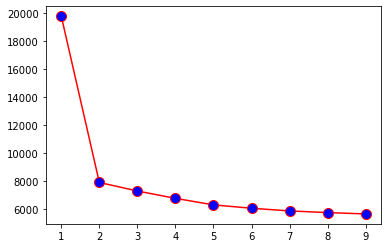

In [25]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)),l, c='r', marker='o' , markerfacecolor='blue' , markersize=10)

## Final Model 

In [26]:
%load_ext memory_profiler
model1=KMeans(n_clusters=2,init='k-means++',max_iter=50,n_init=10,random_state=42)
%memit model1.fit(jaccard)
model1.inertia_
y_pred=model1.predict(jaccard)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 724.16 MiB, increment: 89.85 MiB


In [27]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [28]:
output={}
for i in np.unique(y_pred):
    output[i]=[]
    for j in range(len(y_pred)):
        if y_pred[j]==i:
            output[i].append(j+1)
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

0 : 330
1 : 3100


In [29]:
from sklearn.decomposition import PCA
Matrix_PCA=PCA(n_components=2)
new=Matrix_PCA.fit_transform(jaccard)
x,y=new[:,0],new[:,1]
cluster_color={0:"orange",1:"blue"}
cluster_names={0:'cluster1',1:'cluster2'}
cluster=model1.labels_.tolist()

In [30]:
jaccard=pd.DataFrame(jaccard)

## Cluster Plot

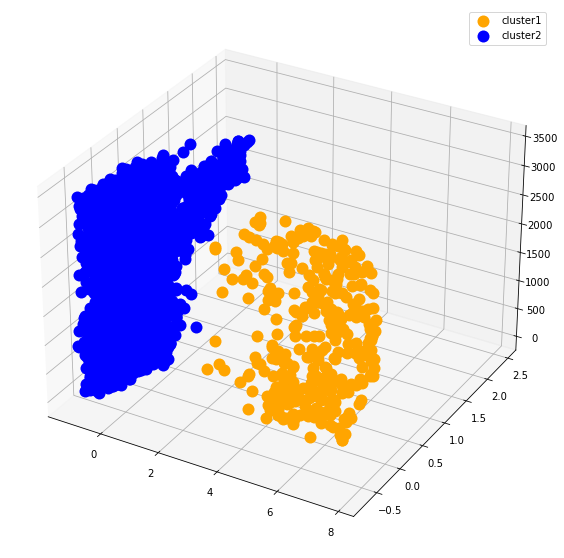

In [31]:
M=pd.DataFrame(dict(x=x,y=y,z=jaccard.columns,label=cluster))
L=M.groupby('label')
plt.figure("NIPS",figsize=(20,10))
axis=plt.axes(projection='3d')
axis.margins(0.05)
for name, group in L:
    
    axis.plot(group.x,group.y,group.z, marker='o',linestyle="",ms=12,
                 label=cluster_names[name],color=cluster_color[name],mec='none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis='x',
                     which='both',
                     bottom='off',
                     top='off',
                     labelbottom='off')
    axis.tick_params(\
                      axis='y',
                      which='both',
                      bottom='off',
                      top='off',
                      labelbottom='off')
axis.legend(numpoints=1)

In [32]:
end=time.time()
end-start

73.99858117103577

# ENRON

In [33]:
start=time.time()

In [34]:
enron=pd.read_csv('docwordenron.txt',skiprows=3,sep=' ',header=None)

In [35]:
enron

,0,1,2
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
...,...,...,...
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1


## Taking sample from the data 

In [36]:
enron1=enron.groupby([2], group_keys=False).apply(lambda x: x.sample(frac=0.01,random_state=42))

## Creating Sparse Matrix 

In [37]:
sparse_matrix=enron1.pivot(index=[0],columns=[1],values=[2])

In [38]:
sparse_matrix=sparse_matrix.fillna(0)

In [39]:
sparse_matrix.columns=list(set(enron1[1]))

In [40]:
sparse_matrix

,4,8,10,17,19,20,25,27,30,34,...,28051,28054,28056,28060,28063,28084,28089,28090,28091,28096
0,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating Jaccard matrix 

In [41]:
from sklearn.metrics import pairwise_distances
num = sparse_matrix.to_numpy()
jaccard = 1-pairwise_distances(num, metric = 'jaccard')

C:\Users\LENOVO\anaconda3\envs\XCS224N\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [42]:
jaccard=pd.DataFrame(jaccard)

## fitting the data into K-Means Model

In [43]:
%load_ext memory_profiler
from sklearn.cluster import KMeans
l=[]
for i in range(1,10):
    model=KMeans(n_clusters = i,init = 'k-means++',max_iter = 50,n_init = 10)
    %memit model.fit(jaccard)
    l.append(model.inertia_)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 4185.55 MiB, increment: 2950.58 MiB
peak memory: 4169.30 MiB, increment: 3937.64 MiB
peak memory: 4397.02 MiB, increment: 4283.93 MiB
peak memory: 4073.88 MiB, increment: 3960.46 MiB
peak memory: 4303.75 MiB, increment: 4108.27 MiB
peak memory: 4234.62 MiB, increment: 3944.94 MiB
peak memory: 4426.98 MiB, increment: 4181.89 MiB
peak memory: 4489.91 MiB, increment: 4154.32 MiB
peak memory: 4516.76 MiB, increment: 4252.95 MiB


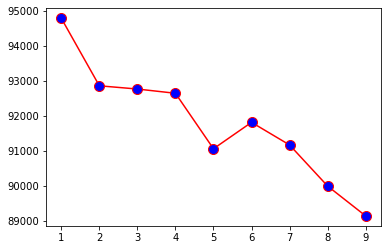

In [44]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)),l, c='r', marker='o' , markerfacecolor='blue' , markersize=10)

## Final Model

In [45]:
%load_ext memory_profiler
model1=KMeans(n_clusters=3,init='k-means++',max_iter=50,n_init=10,random_state=42)
%memit model1.fit(jaccard)
model1.inertia_
y_pred=model1.predict(jaccard)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 4610.29 MiB, increment: 4157.82 MiB


In [46]:
output={}
for i in np.unique(y_pred):
    output[i]=[]
    for j in range(len(y_pred)):
        if y_pred[j]==i:
            output[i].append(j+1)
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

0 : 2
1 : 16444
2 : 62


In [47]:
from sklearn.decomposition import PCA
Matrix_PCA=PCA(n_components=2)
new=Matrix_PCA.fit_transform(jaccard)
x,y=new[:,0],new[:,1]
cluster_color={0:"#FF4040",1:"#7FFF00",2:"#0A0A0A"}
cluster_names={0:'cluster1',1:'cluster2',2:'cluster3'}
cluster=model1.labels_.tolist()

## Final Plot of the Cluster

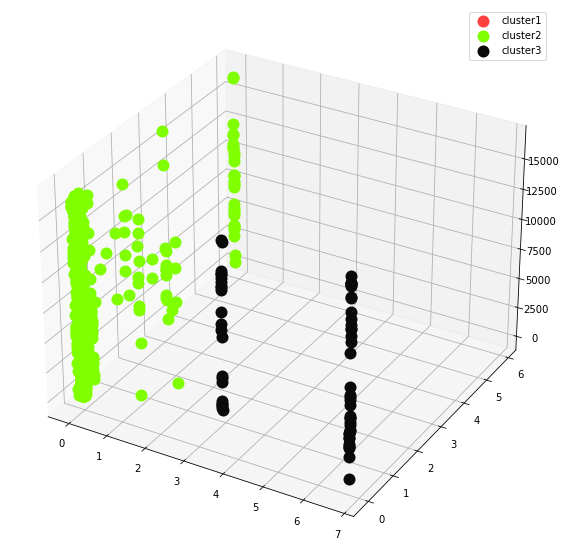

In [48]:
M=pd.DataFrame(dict(x=x,y=y,z=jaccard.columns,label=cluster))
L=M.groupby('label')
plt.figure("NIPS",figsize=(20,10))
axis=plt.axes(projection='3d')
axis.margins(0.05)
for name, group in L:
    
    axis.plot(group.x,group.y,group.z, marker='o',linestyle="",ms=12,
                 label=cluster_names[name],color=cluster_color[name],mec='none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis='x',
                     which='both',
                     bottom='off',
                     top='off',
                     labelbottom='off')
    axis.tick_params(\
                      axis='y',
                      which='both',
                      bottom='off',
                      top='off',
                      labelbottom='off')
axis.legend(numpoints=1)

In [49]:
end=time.time()
end-start

1828.5315713882446